# $$\textbf{Plummer sphere at equilibrium}$$

## <img src="plummer_stablef.gif" align="right" width="600px"/>

## A quick recap (very quick!): 

The Plummer sphere has a density profile that goes as: 

$$\rho(r) = \frac{3M_{tot}}{4\pi b^2} \frac{1}{(1 + r^2/b^2)^{5/2}}$$

The mass profile becomes: 

$$M(r) = \frac{r^3 M_{tot}}{b^3} \frac{1}{(1 + r^2/b^2)^{3/2}}$$

 meaning that we can extract the radius distribution of particles: 
 
$$r = \frac{(c b^3)^{1/3}}{(1 - 1/b^2 (c b^3)^{2/3})^{1/2}}$$

where $b$ is a scale factor, and $c = \mathrm{cdf(x)}$.

The other coordinates are the usual ones for spherical symmetry: 

$$p(\Phi) = \frac{1}{2\pi}$$

$$p(\Theta) = \frac{\sin{\theta}}{2}$$

from which we extract the parameters.


<br clear="right"/>

### Stability criteria: 

- If the system is at equilibrium we're not allowed to lose particles, wo their energy must always be < 0 in order to preserve their bound state; 

- The dispersion $\sigma$ is the same for all three directions due to isotropy and it's the min cause for stability, so we need to generate a velocity distribution that supports this constraint; 

- To sample this distribution we cannot use standard methods of reverting the integral result (non integrable :(!), so we use the rejection method to sample $q$ from which to extract the $v$ module: 

$$f(x)_{integral} = (1 - q^{2})^{7/2} q^{2}$$

We convert into $v$: 

$$v = q \cdot \sqrt{2 \Phi}$$

with $\Phi$ the potential at fixed $r$, $\sqrt{2 \Phi}$ the $\textit{escape velocity}$, and $q < 1$, indicating that $v < v_{esc}$. 

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd
from tqdm.notebook import tqdm

from scipy.stats import uniform

plt.rcParams['font.family'] = 'serif'
plt.rcParams['mathtext.fontset'] = 'cm'
plt.rcParams['font.serif'] = ['Liberation Serif'] + plt.rcParams['font.serif']
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=[6,6]

## $${\textbf{Settings}}$$

In [65]:
# set initial parameters: 

N = int(1e4)
M = 1 
m = M / N
b = 1

In [66]:
def find_rs(b, N): 
    
    rad3_cb3 = (uniform.rvs(0, 1, size=N) * b**3)**(1/3)
    
    return rad3_cb3 / (1 - 1 / b**2 * rad3_cb3**2)**(1/2)

def find_pot(b, rs):
    
    return -1 * M / (b**2 + rs**2)**(1/2)

In [67]:
# generate the distribution: 

cdf_theta = uniform.rvs(0, 1, size=N)  # cumulative function of thetas
thetas = np.arccos(1 - 2 * cdf_theta)

phis = uniform.rvs(0, 2 * np.pi, size=N) 

rays = find_rs(b, N)

In [68]:
#convert to cartesian

x = rays * np.sin(thetas) * np.cos(phis)
y = rays * np.sin(thetas) * np.sin(phis)
z = rays * np.cos(thetas) 

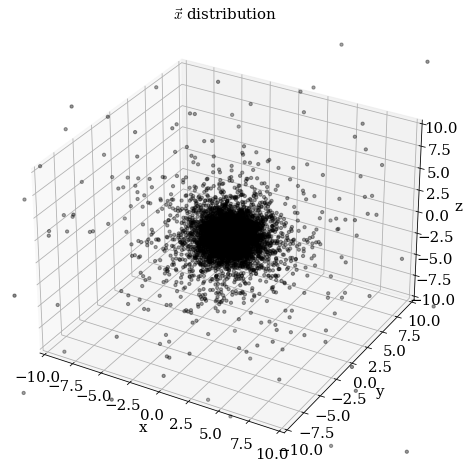

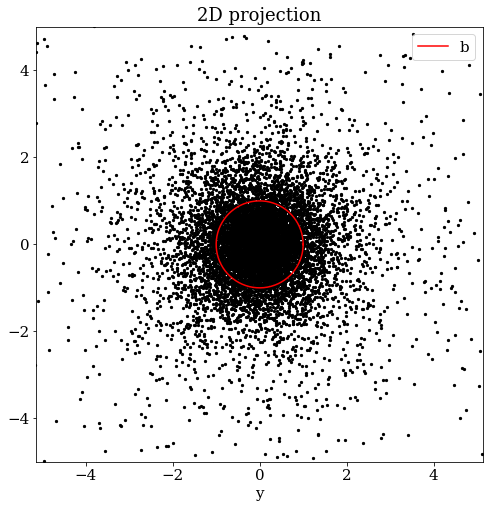

In [69]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(x, y, z, c = 'black', s=10.5)
ax.set_aspect('equal')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
ax.set_xlim(-10, 10)
ax.set_ylim(-10, 10)
ax.set_zlim(-10, 10)
ax.set_title(r'$\vec{x}$ distribution', fontsize=15)
plt.show();

plt.figure(figsize = (8,8))
theta = np.linspace( 0 , 2 * np.pi , 150 )
a = b * np.cos( theta )
c = b * np.sin( theta )
plt.scatter(x,y, c='black', s=5)
plt.plot(a, c, c='red', label='b')
plt.axis('equal')
plt.xlim(-5,5)
plt.ylim(-5,5)
plt.xlabel('x')
plt.xlabel('y')
plt.title('2D projection')
plt.legend();

### Potential

In [7]:
# evaluate the potential Phi:

Phis = find_pot(b, rays)

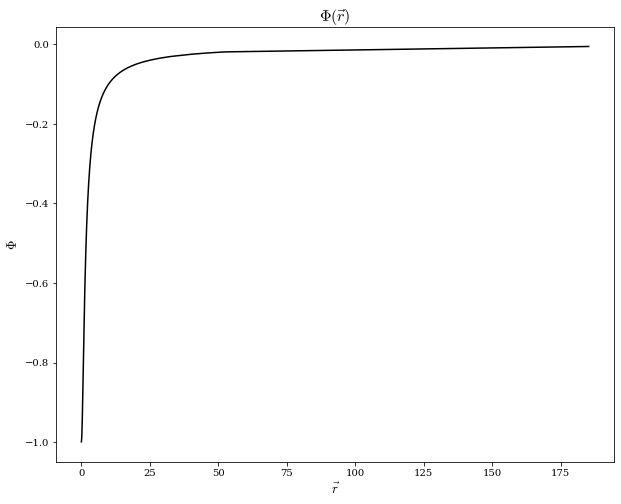

In [32]:
#graph: 
plt.figure(figsize = (10,8))
plt.plot(rays[np.argsort(rays)], Phis[np.argsort(rays)], c='k')
plt.title(r"$\Phi(\vec{r})$", fontsize=16)
plt.xlabel(r"$\vec{r}$", fontsize=13)
plt.ylabel("$\Phi$", fontsize=13);

I now use $\Psi = \Phi + \Phi_0$, where I decided to set $\Phi_0 = 0$.

### Escape velocity

In [9]:
# compute escape velocities: 

vs_esc = (2 * (-1 * Phis))**(1/2)

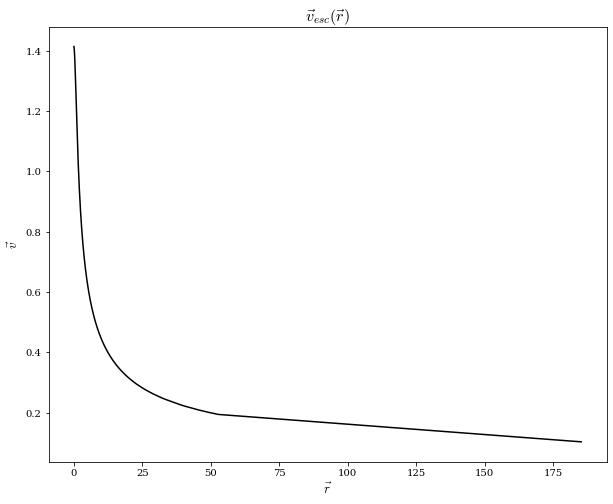

In [33]:
#graph: 
plt.figure(figsize = (10,8))
plt.plot(rays[np.argsort(rays)], vs_esc[np.argsort(rays)], c='k')
plt.title(r"$\vec{v}_{esc}(\vec{r})$", fontsize=16)
plt.xlabel(r"$\vec{r}$", fontsize=13)
plt.ylabel(r"$\vec{v}$", fontsize=13);

### $$v \ \ \text{sampling}$$

In [34]:
def integral_function(x): 
    
    return  512 / (7 * np.pi) * (1 - x**2)**(7/2) * x**2

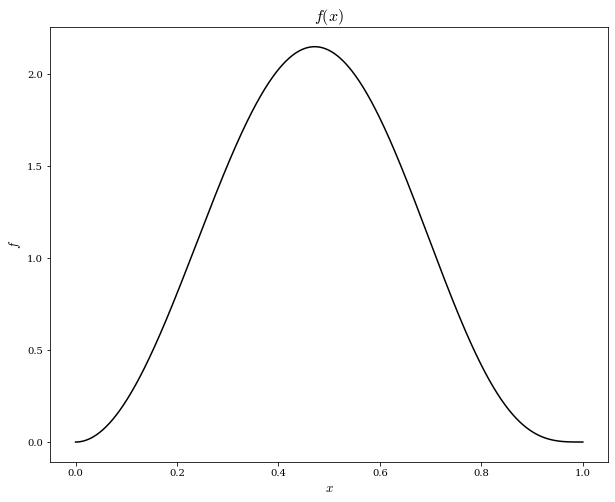

In [35]:
x_grid = np.linspace(0, 1, N)

plt.figure(figsize = (10,8))
plt.plot(x_grid, integral_function(x_grid), c='k')
plt.title("$f(x)$", fontsize=16)
plt.xlabel("$x$", fontsize=13)
plt.ylabel("$f$", fontsize=13);

In [36]:
def rejection_sampling(x, N):
    
    counts = 0
    y_i_ok = []
    
    while counts < N: 
    
        x_i = uniform.rvs(0, np.max(x))
        y_i = uniform.rvs(0, np.max(integral_function(x)))  # I generate the y_i points uniformly
    
        if y_i <= integral_function(x_i):
            
            #print('accepted!')
            y_i_ok.append(x_i)
            counts = counts + 1
            
        #else: 
            
            #print('rejected..')
            
    
    return y_i_ok

In [37]:
y_i_ok = rejection_sampling(x_grid, N)

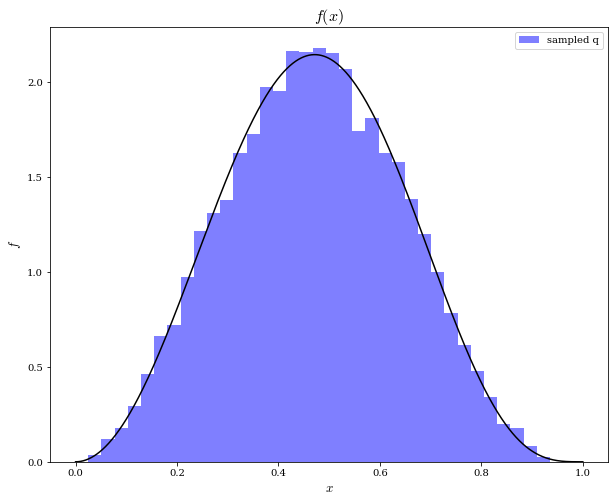

In [38]:
plt.figure(figsize = (10,8))
plt.plot(x_grid, integral_function(x_grid), c='k')
plt.hist(y_i_ok, 35, density=True, color='blue', alpha=0.5, label='sampled q')
plt.title("$f(x)$", fontsize=16)
plt.xlabel("$x$", fontsize=13)
plt.ylabel("$f$", fontsize=13)
plt.legend();

In [20]:
vs = y_i_ok * vs_esc

In [70]:
# generate the velocities: 

cdf_theta = uniform.rvs(0, 1, size=N)  # cumulative function of thetas
thetas = np.arccos(1 - 2 * cdf_theta)

phis = uniform.rvs(0, 2 * np.pi, size=N) 

vx = vs * np.sin(thetas) * np.cos(phis)
vy = vs * np.sin(thetas) * np.sin(phis)
vz = vs * np.cos(thetas)

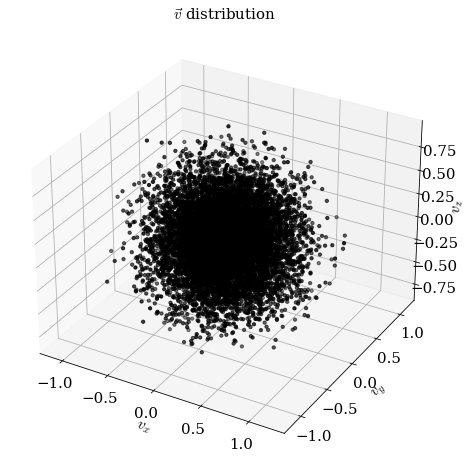

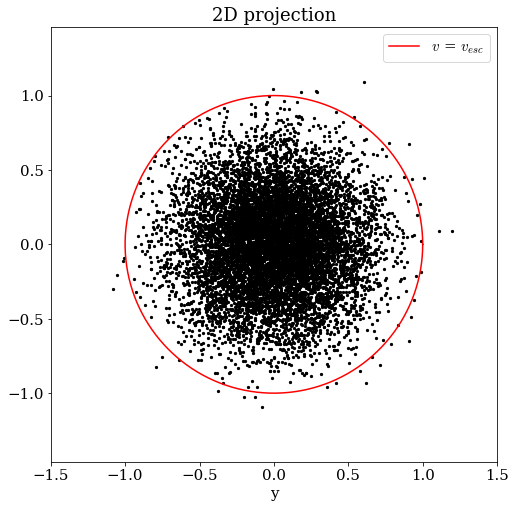

In [72]:
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(projection='3d')
ax.scatter(vx, vy, vz, c = 'black', s=10.5)
ax.set_aspect('equal')
ax.set_xlabel('$v_x$')
ax.set_ylabel('$v_y$')
ax.set_zlabel('$v_z$')
ax.set_title(r'$\vec{v}$ distribution', fontsize=15)
#ax.set_xlim(-13, 13)
#ax.set_ylim(-13, 13)
#ax.set_zlim(-13, 13)
plt.show();


plt.figure(figsize = (8,8))
a = 1 * np.cos( theta )  # 1 is v = v_esc
c = 1 * np.sin( theta )
plt.scatter(vx,vy, c='black', s=5)
plt.plot(a, c, c='red', label='$v$ = $v_{esc}$')
plt.axis('equal')
plt.xlim(-1.5,1.5)
plt.ylim(-1.5,1.5)
plt.xlabel('x')
plt.xlabel('y')
plt.title('2D projection')
plt.legend();

### Produce input file

Let's try to simulate:

In [44]:
'''
# open the file
file = open('plummer_sphere.txt', 'w')

# write the file
file.write(f'{N}\n')
file.write('3\n') # dimensions
file.write('0\n')

for i in range(N):
    file.write(f'{m}\n')

for i in range(N):
    file.write(f'{x[i]} {y[i]} {z[i]}\n')
    
for i in range(N):
    file.write(f'{vx[i]} {vy[i]} {vz[i]}\n')

# close the file
file.close()
'''

"\n# open the file\nfile = open('plummer_sphere.txt', 'w')\n\n# write the file\nfile.write(f'{N}\n')\nfile.write('3\n') # dimensions\nfile.write('0\n')\n\nfor i in range(N):\n    file.write(f'{m}\n')\n\nfor i in range(N):\n    file.write(f'{x[i]} {y[i]} {z[i]}\n')\n    \nfor i in range(N):\n    file.write(f'{vx[i]} {vy[i]} {vz[i]}\n')\n\n# close the file\nfile.close()\n"

In [45]:
def dyn_time(rho_0): 
    
    G = 1
    
    return np.sqrt(3 * np.pi / (16 * G * rho_0)) 

def coll_time(rho_0): 
    
    G = 1
    
    return np.sqrt(3 * np.pi / (32 * G * rho_0))

In [74]:
V_0 = 4/3 * np.pi * b**3
numb_density = N/V_0 
rho_0 = M/V_0
print('dyn time:', dyn_time(rho_0))

print('')

t_sim = 8*dyn_time(rho_0)

dtime = 0.01 # Timestep: roughly the total time of simulation / number of frames that we want
eps = (1/numb_density)**(1/3) # Softening: roughly the radius associated to each particle
theta = 0.1 
tstop = t_sim # Total time of the simulation
dtout = 0.1

command = f'time ./treecode in=plummer_sphere.txt out=output_plummer.txt dtime={dtime} eps={eps} theta={theta} tstop={tstop} dtout={dtout} >snapshot.txt ; echo Process returned$?'
print('using command:', command)

dyn time: 1.5707963267948963

using command: time ./treecode in=plummer_sphere.txt out=output_plummer.txt dtime=0.01 eps=0.0748220385363649 theta=0.1 tstop=12.56637061435917 dtout=0.1 >snapshot.txt ; echo Process returned$?


# $$\textbf{Data analysis}$$

In [75]:
file_name = 'output_plummer.txt'

In [76]:
file = open(file_name, 'r')

N_part = int(file.readline()) # read the first line where is written the number of particles
dim = file.readline()
t_0 = file.readline() # read the third line where is written the initial time

file.seek(0) # go back to the beginning of the file

N_lines = len(file.readlines())

print('N_part : ', N_part)
print('dim : ', dim)
print('initial time : ', t_0)
print('N_lines: ', N_lines)

N_part :  10000
dim :   3

initial time :    0.0000000E+00

N_lines:  1260126


In [77]:
N_lines_snap = 3+N_part*3
N_snap = N_lines / N_lines_snap # determine the number of snapshots

print('N snapshot: ', N_snap)

N snapshot:  42.0


In [78]:
data = pd.read_csv(file_name, names=list(range(7)), sep = ' ')

def dati (data, N):
    
    x = []
    y = []
    z = []
    
    start = N + 3
    step  = N * 3 + 3
    
    a = (np.array([data.iloc[i::step,:].copy() for i in range(start,start+N)]))
    for j in range(len(a)):
        temp = np.array([a[j][i][~np.isnan(a[j][i])] for i in range(len(a[j]))])
        x.append(temp[:,0])
        y.append(temp[:,1])
        z.append(temp[:,2])
    
    r = np.array([(x[i]**2+y[i]**2+z[i]**2)**0.5 for i in range(N)])
    
    t = (np.array(data.iloc[2::step,:].copy()))[:,2]
    
    return x,y,z,r,t

x,y,z,r,t=dati(data, N_part)

In [79]:
index=np.array(range(N_part))
index=index[::100]

### Plotting trajectories in the 3D plane

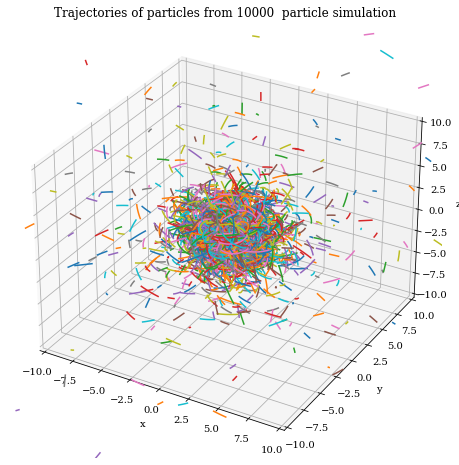

In [80]:
from mpl_toolkits import mplot3d

%matplotlib inline

l=10


fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection = '3d')

for i in range(N_part):
    ax.plot3D(x[i], y[i], z[i])

ax.axes.set_xlim3d(left=-l, right=l) 
ax.axes.set_ylim3d(bottom=-l, top=l) 
ax.axes.set_zlim3d(bottom=-l, top=l)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Trajectories of particles from %d  particle simulation" %N_part)
#plt.savefig("trajectory_100", format='pdf')
plt.show()

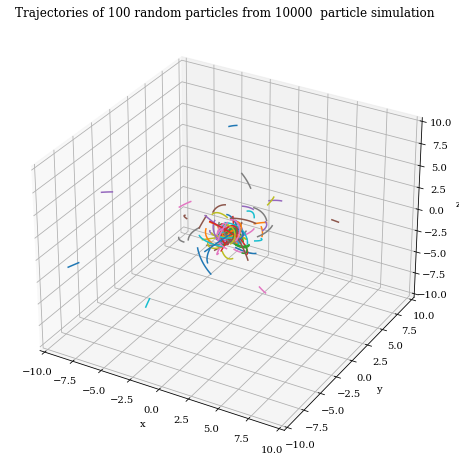

In [81]:
fig = plt.figure(figsize = (8,8))
ax = plt.axes(projection = '3d')

for i in index:
    ax.plot3D(x[i], y[i], z[i])

ax.axes.set_xlim3d(left=-10, right=10) 
ax.axes.set_ylim3d(bottom=-10, top=10) 
ax.axes.set_zlim3d(bottom=-10, top=10)
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title("Trajectories of %d random particles from %d  particle simulation" %(len(index),N_part))
#plt.savefig("trajectory_100000", format='pdf')
plt.show()

### Plotting trajectories in the 2D plane

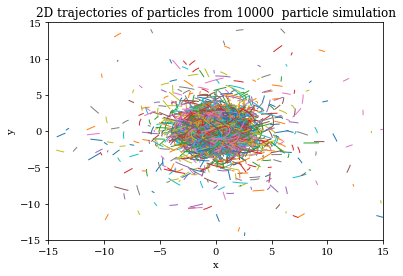

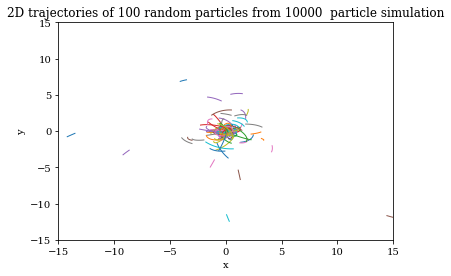

In [82]:
for i in range(N_part):
    plt.plot(x[i], y[i], lw=1)
    
plt.ylabel("y")
plt.xlabel("x")
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.title("2D trajectories of particles from %d  particle simulation" %N_part)
#plt.savefig("2D_trajectory_100", format='pdf')
plt.show()
plt.show()

for i in index:
    plt.plot(x[i], y[i], lw=1)
    
plt.ylabel("y")
plt.xlabel("x")
plt.xlim(-15,15)
plt.ylim(-15,15)
plt.title("2D trajectories of %d random particles from %d  particle simulation" %(len(index),N_part))
#plt.savefig("2D_trajectory_100000", format='pdf')
plt.show()

### Radii analysis

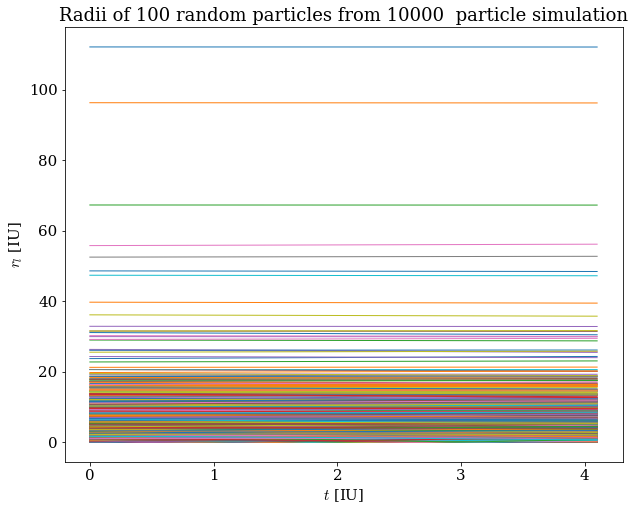

In [83]:
t=np.linspace(0, t[-1], int(N_snap))

plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=[10,8]

for i in range(N_part):
    plt.plot(t, r[i], lw=1)
    
plt.xlabel('$t$ [IU]')
plt.ylabel('$r_l$ [IU]')
plt.title("Radii of %d random particles from %d  particle simulation" %(len(index),N_part));

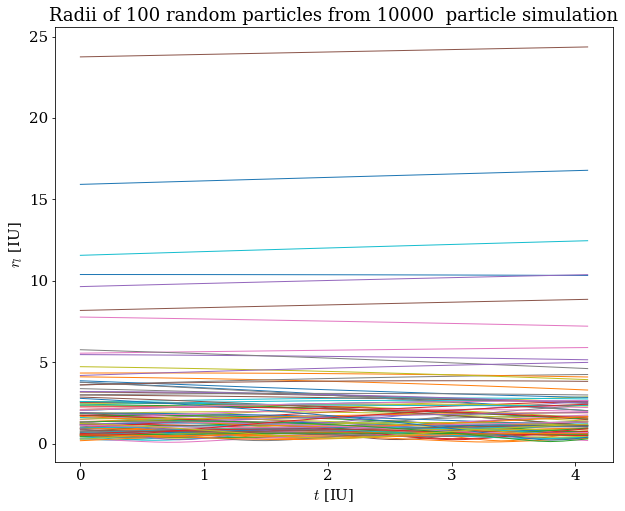

In [84]:
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=[10,8]

for i in index:
    plt.plot(t, r[i], lw=1)

plt.xlabel('$t$ [IU]')
plt.ylabel('$r_l$ [IU]')
plt.title("Radii of %d random particles from %d  particle simulation" %(len(index),N_part))
#plt.vlines(t_coll, 0, 18, ls='--', color='black', label='$T_{coll}$')
#plt.legend()
#plt.savefig("radius_100000", format='pdf')
plt.show()

### Computing the error: 

The Lagrangian radius is the radius from the centre at which we find 80% of the entire mass of our distribution. If the sphere is stable, then this quantity should be a constant. We decided to see how close we are to the actual radius 'fixed' at the beginning. We then evaluate the absolute deviation and derive the relative error. 

In [85]:
b = []
for i in range(len(t)):
    a = np.sort(r[:,i])
    mask = a<np.quantile(a,0.8)
    b.append(np.max(a[mask]))

In [86]:
a = np.sort(r[:,0])
mask = a<np.quantile(a,0.8)
lagr_0=np.max(a[mask])

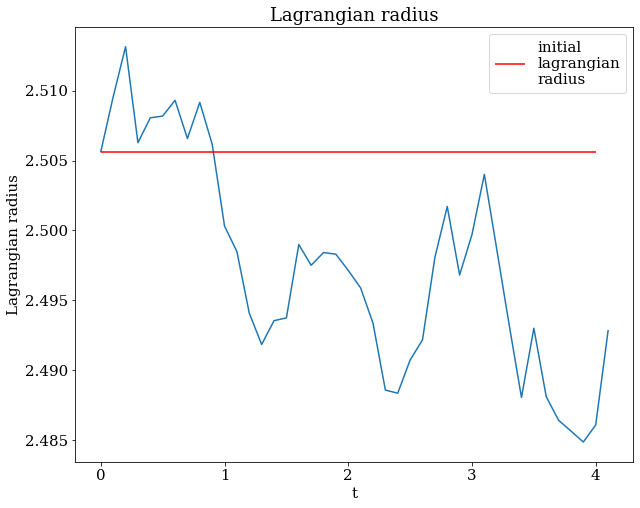

In [90]:
plt.plot(t, b)
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=[10,8]

plt.hlines(lagr_0, 0, 4, color='red', label='initial\nlagrangian\nradius')

plt.ylabel("Lagrangian radius")
plt.xlabel("t")
plt.title("Lagrangian radius")
plt.legend()
plt.show()

In [91]:
sigma_r = [np.abs(lagr_0 - b[i])/lagr_0 for i in range(0, len(t))]

We here plot the relative error with respect to the $\textit{ideal}$ Lagrangian radius:

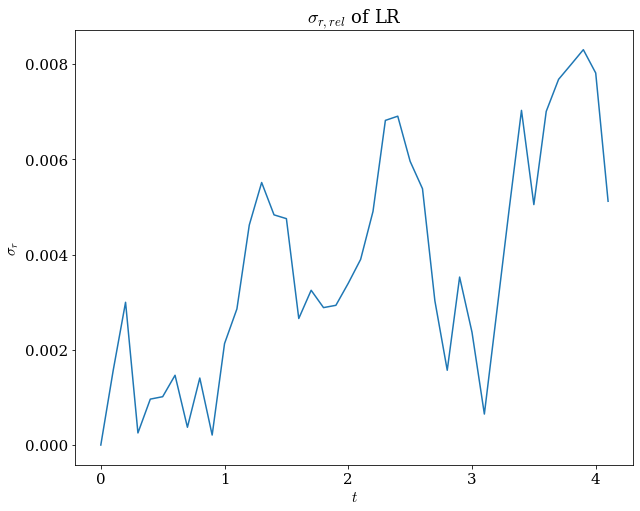

In [92]:
plt.rcParams['font.size']=15
plt.rcParams['figure.figsize']=[10,8]

plt.plot(t, sigma_r)
plt.ylabel("$\sigma_{r}$")
plt.xlabel("$t$")
plt.title("$\sigma_{r, rel}$ of LR")

plt.show()

The hihest peak is reached at $\sigma_{r, rel} \simeq 0.1\%$, and it seems to have an increasing trend. 

### Density analysis

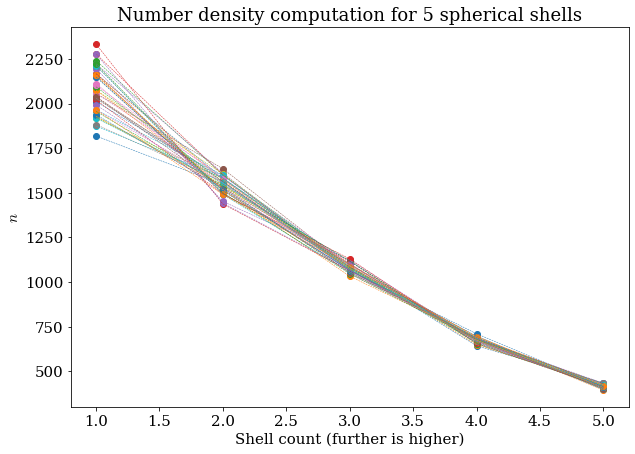

In [105]:
def dens(r1, r2, rays): #function that compute the density
    V = 4/3 * np.pi *(r1**3 - r2**3)
    Len = len(rays[rays < r1]) - len(rays[rays < r2])
    M_shell = Len * m
    return Len / V

fig = plt.figure(figsize = (10,7))
ax = fig.add_subplot(111)
R = [0.1, 0.3, 0.5, 0.7, 0.9, 1.1]

for i in range(len(t)): 
    
    densities = [dens(R[0], R[1], r[:,i]), dens(R[1], R[2], r[:,i]), dens(R[2],R[3], r[:,i]), dens(R[3], R[4], r[:,i]), dens(R[4], R[5], r[:,i])]
    
    ax.scatter(list(range(1,6)), densities)
    ax.plot(list(range(1,6)), densities, ls='--', lw=0.5)
    ax.set_title('Number density computation for 5 spherical shells')
    ax.set_ylabel(f'$n$')
    ax.set_xlabel('Shell count (further is higher)')